# Lab 07 - UMAP Demonstration with the Iris Dataset

Start by copying this lab notebook into your notebook folder, and run it step by step from there.

## Introduction

In this notebook, we will explore the UMAP (Uniform Manifold Approximation and Projection) technique using the well-known Iris dataset. We will visualize the dataset in 2D and examine how different parameters affect the UMAP projection.

### 1. Importing Necessary Libraries


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import umap

# Setting a random seed for reproducibility
np.random.seed(42)


### 2. Loading the Iris Dataset

We will load the Iris dataset, which contains 150 samples with four features each, representing three different species of Iris flowers.


In [8]:
# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

# Create a DataFrame for easy manipulation and plotting
iris_df = pd.DataFrame(data, columns=iris.feature_names)
iris_df['species'] = target
iris_df['species_name'] = [target_names[i] for i in target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



### 3. UMAP Basics

UMAP is a dimensionality reduction technique that excels at preserving both global and local structures. We'll start by performing a basic 2D UMAP projection of the Iris dataset.

#### 3.1 Basic 2D UMAP Projection

/home/user/.virtualenvs/soxm/lib64/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


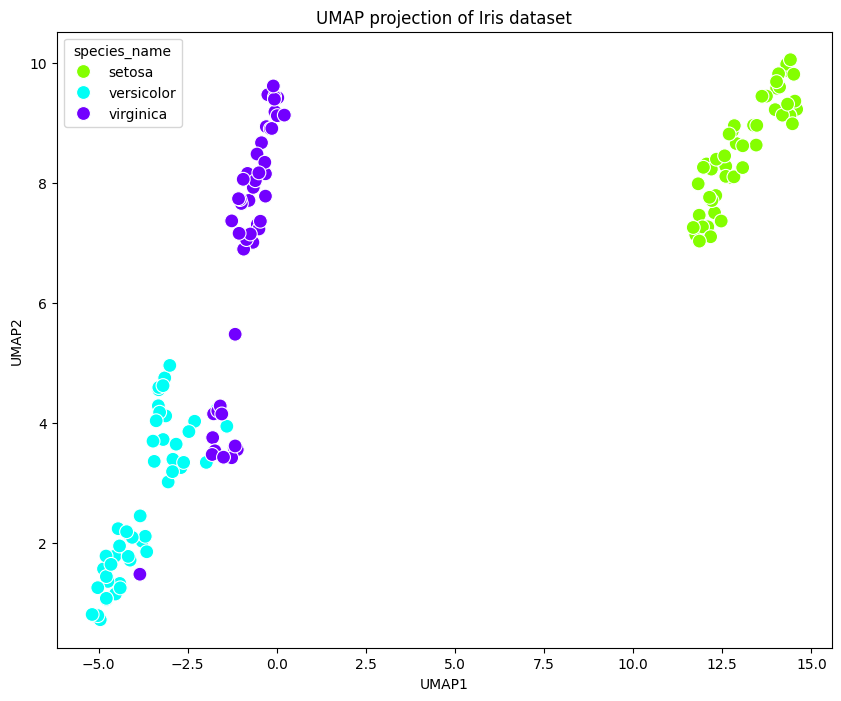

In [9]:
# Create a UMAP reducer with default parameters
reducer = umap.UMAP(n_components=2, random_state=42)

# Fit and transform the data to 2D
embedding = reducer.fit_transform(data)

# Add the UMAP coordinates to the DataFrame
iris_df['UMAP1'] = embedding[:, 0]
iris_df['UMAP2'] = embedding[:, 1]

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='UMAP1', y='UMAP2',
    hue='species_name',
    palette=sns.color_palette("hsv", 3),
    data=iris_df,
    legend='full',
    s=100
)
plt.title('UMAP projection of Iris dataset')
plt.show()


#### 3.2 Varying `n_neighbors`

The `n_neighbors` parameter determines the number of neighboring points used in local approximations. Higher values lead to more global structure preservation while lower values focus on local relationships.


/home/user/.virtualenvs/soxm/lib64/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


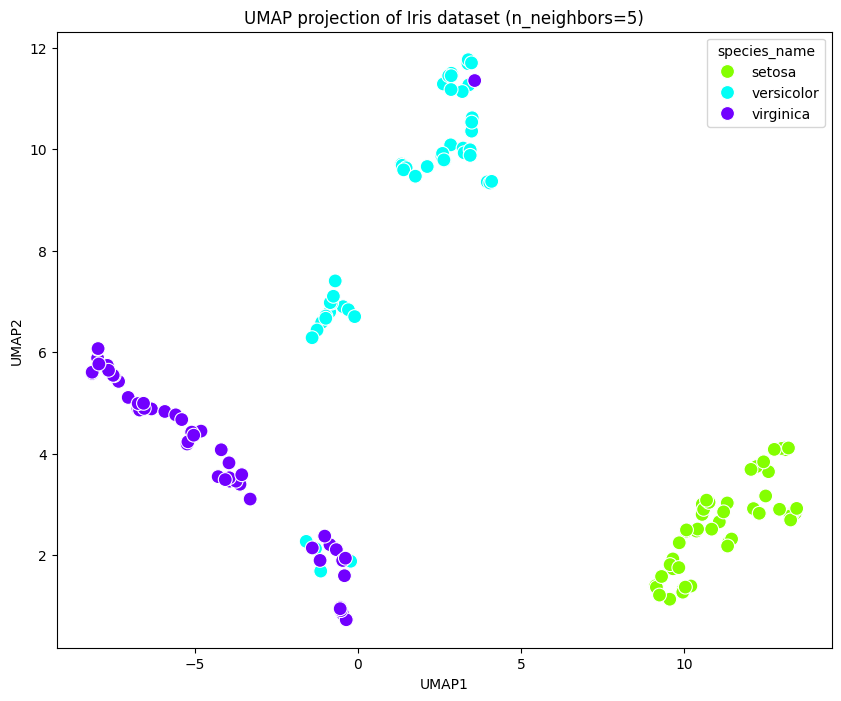

/home/user/.virtualenvs/soxm/lib64/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


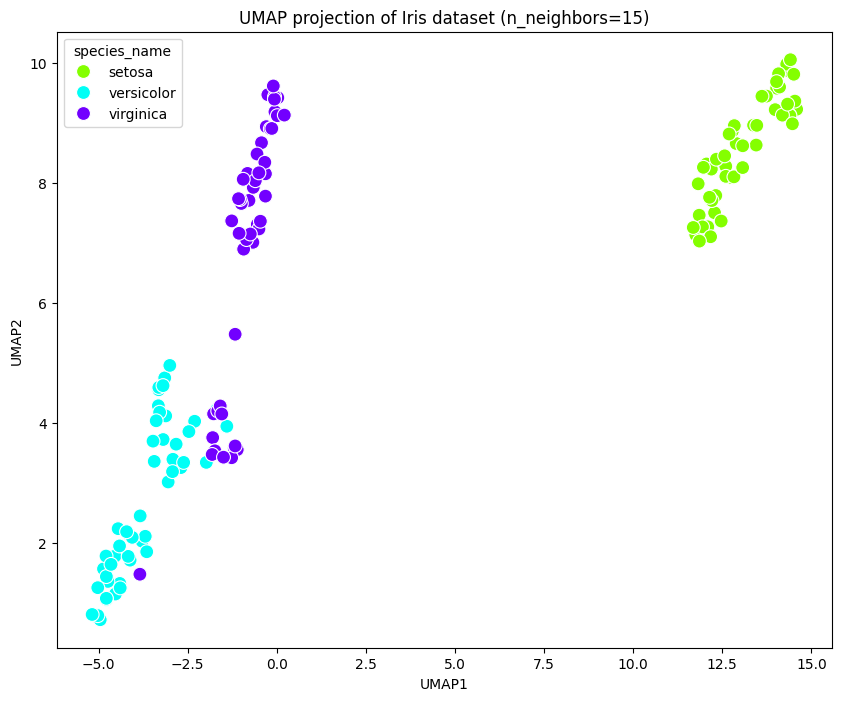

/home/user/.virtualenvs/soxm/lib64/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


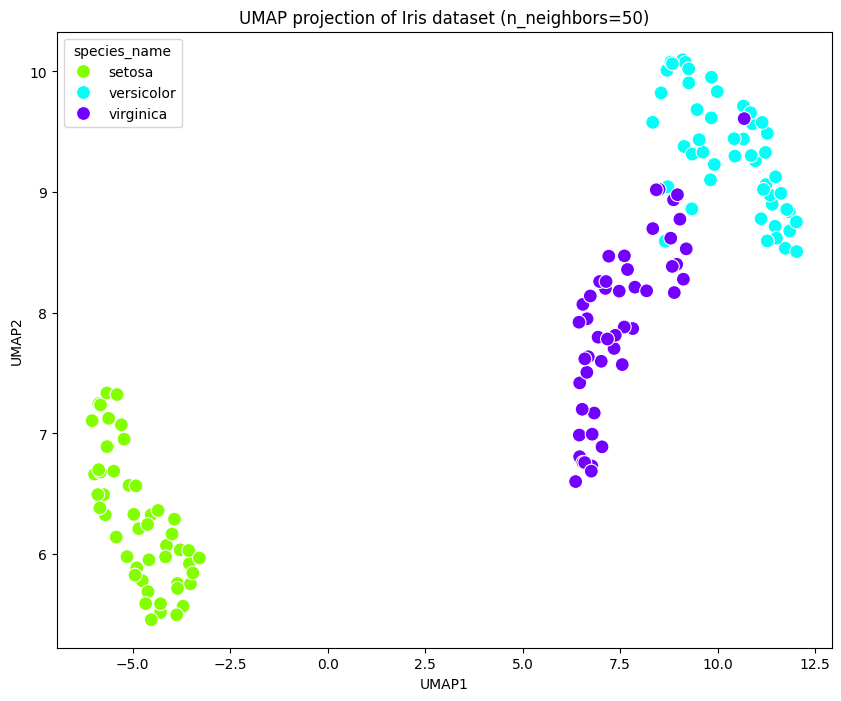

In [10]:
def plot_umap(n_neighbors):
    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, random_state=42)
    embedding = reducer.fit_transform(data)
    iris_df['UMAP1'] = embedding[:, 0]
    iris_df['UMAP2'] = embedding[:, 1]
    
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='UMAP1', y='UMAP2',
        hue='species_name',
        palette=sns.color_palette("hsv", 3),
        data=iris_df,
        legend='full',
        s=100
    )
    plt.title(f'UMAP projection of Iris dataset (n_neighbors={n_neighbors})')
    plt.show()

# Plot with different values of n_neighbors
for n in [5, 15, 50]:
    plot_umap(n_neighbors=n)


#### 3.3 Varying `min_dist`

The `min_dist` parameter controls how closely UMAP packs points together. Lower values mean tighter packing and more compact clusters, whereas higher values provide more uniform spacing.


/home/user/.virtualenvs/soxm/lib64/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


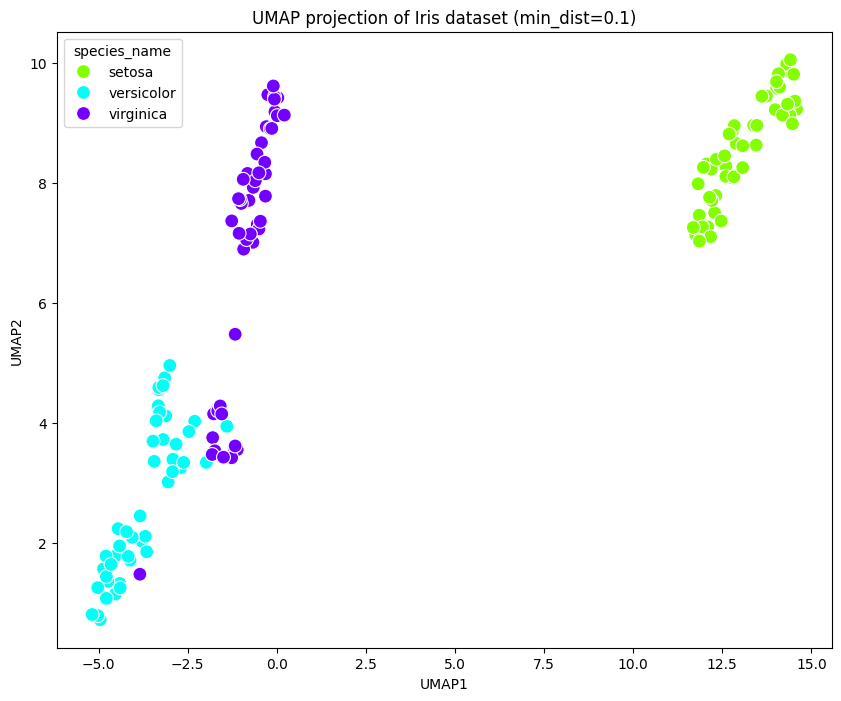

/home/user/.virtualenvs/soxm/lib64/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


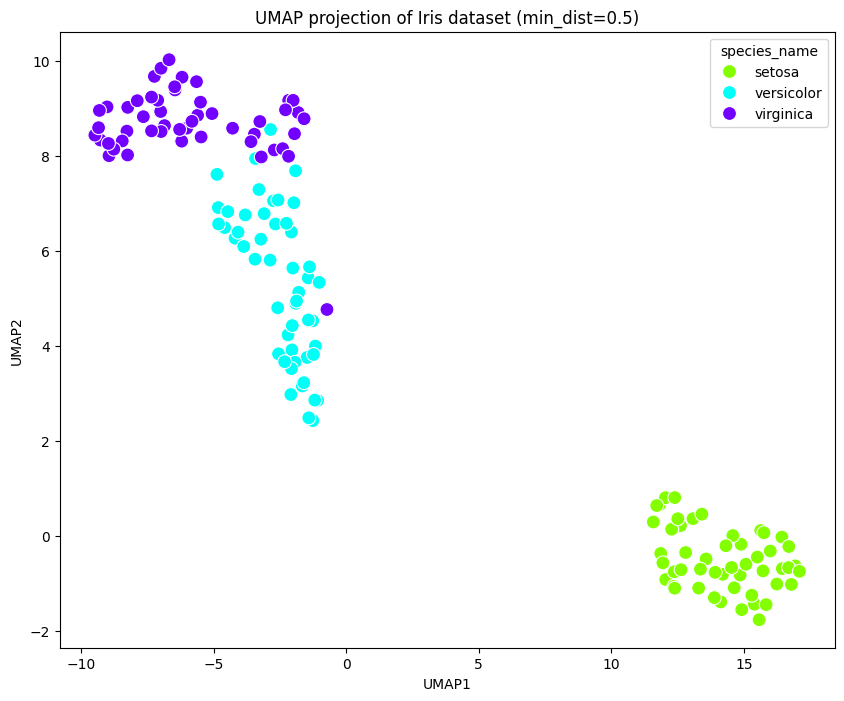

/home/user/.virtualenvs/soxm/lib64/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


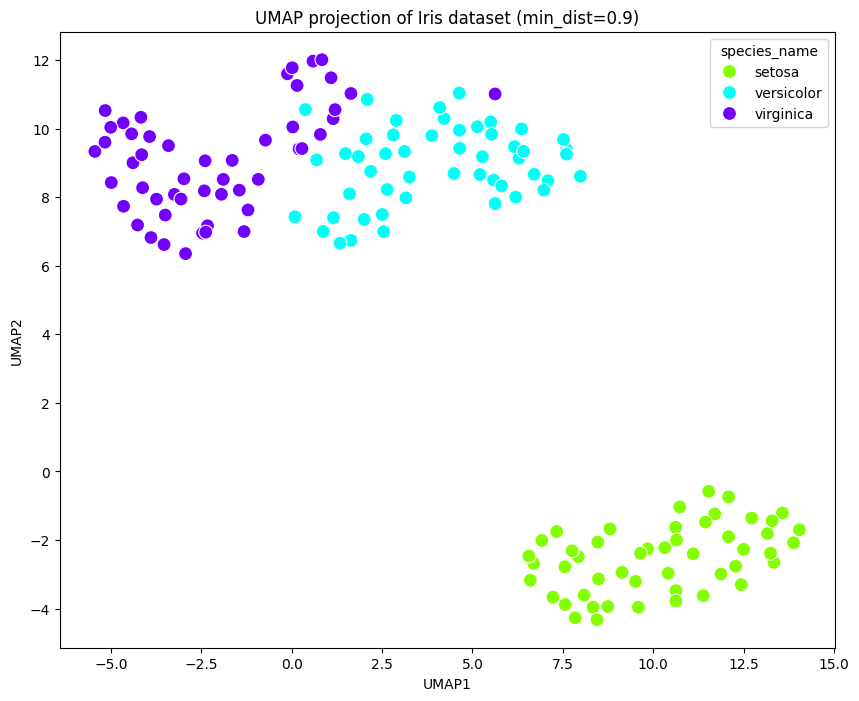

In [11]:
def plot_umap_min_dist(min_dist):
    reducer = umap.UMAP(min_dist=min_dist, n_components=2, random_state=42)
    embedding = reducer.fit_transform(data)
    iris_df['UMAP1'] = embedding[:, 0]
    iris_df['UMAP2'] = embedding[:, 1]
    
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='UMAP1', y='UMAP2',
        hue='species_name',
        palette=sns.color_palette("hsv", 3),
        data=iris_df,
        legend='full',
        s=100
    )
    plt.title(f'UMAP projection of Iris dataset (min_dist={min_dist})')
    plt.show()

# Plot with different values of min_dist
for dist in [0.1, 0.5, 0.9]:
    plot_umap_min_dist(min_dist=dist)



#### 3.4 Varying `n_components`

The `n_components` parameter controls the number of dimensions in which the data will be projected. While 2D is commonly used for visualization, UMAP can reduce data to any number of dimensions.


/home/user/.virtualenvs/soxm/lib64/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


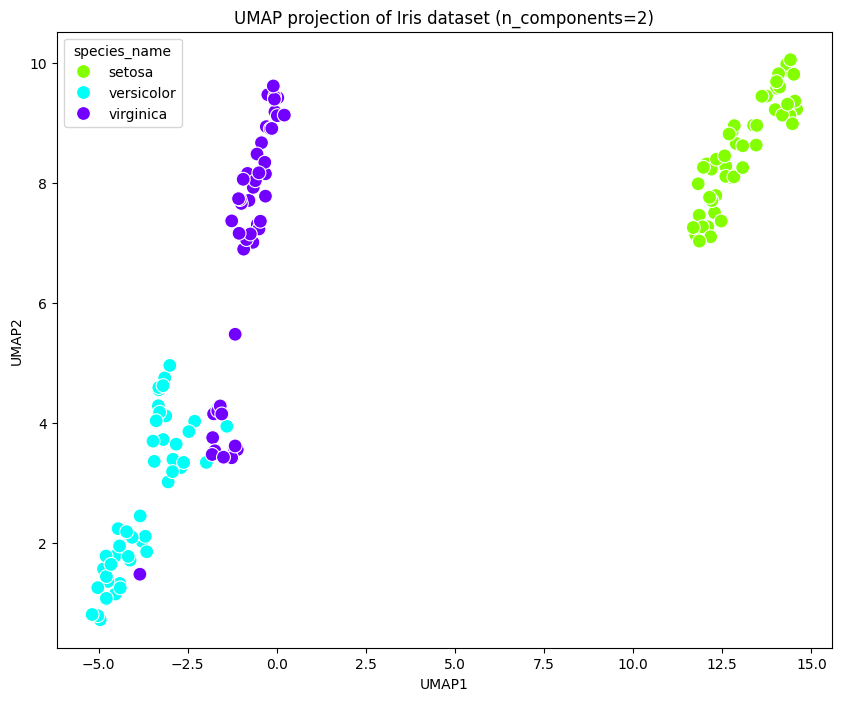

/home/user/.virtualenvs/soxm/lib64/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Figure size 1000x800 with 0 Axes>

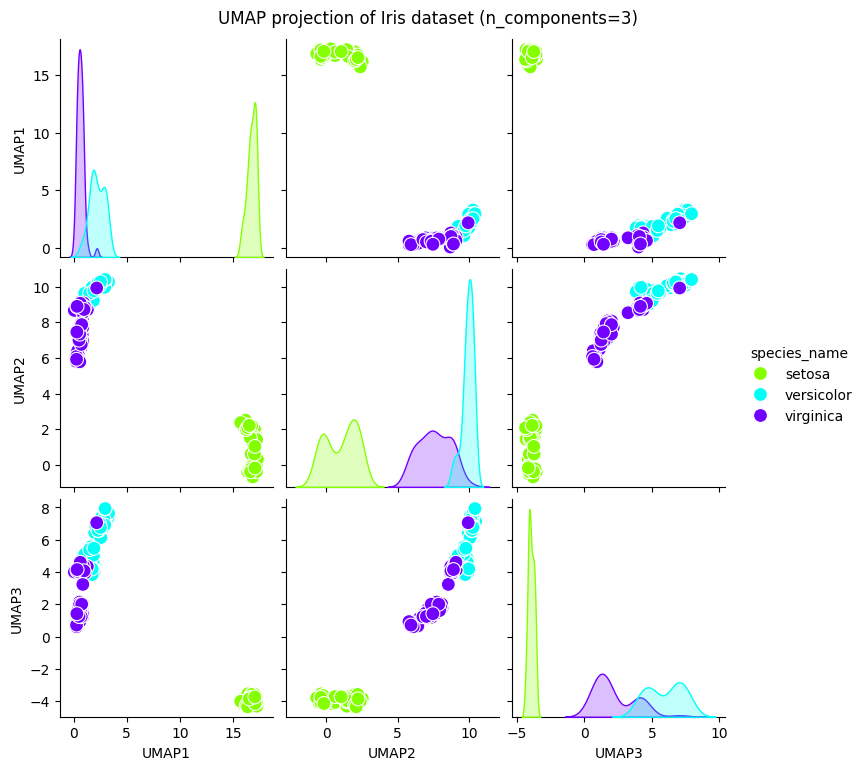

/home/user/.virtualenvs/soxm/lib64/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Figure size 1000x800 with 0 Axes>

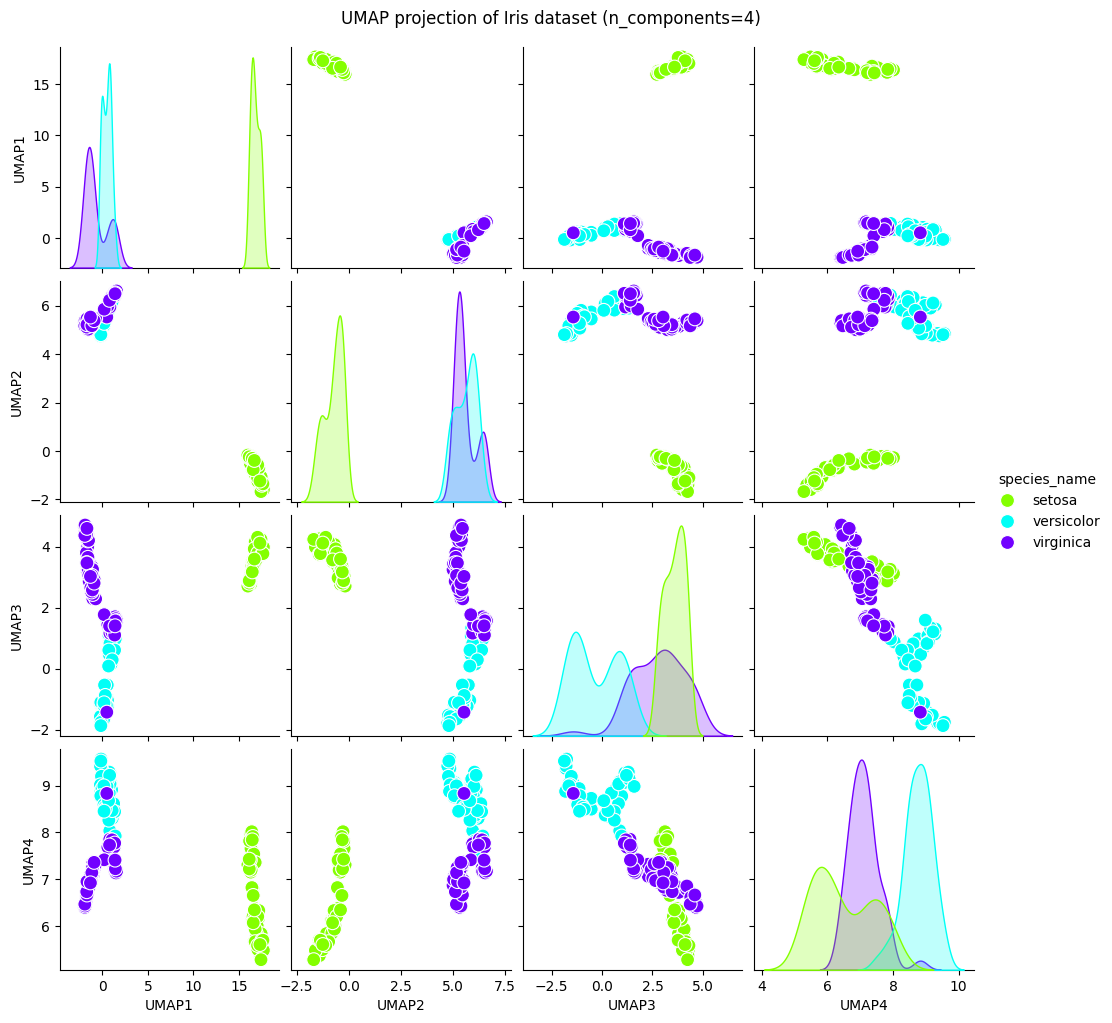

In [12]:
def plot_umap_n_components(n_components):
    reducer = umap.UMAP(n_components=n_components, random_state=42)
    embedding = reducer.fit_transform(data)
    
    if n_components == 2:
        iris_df['UMAP1'] = embedding[:, 0]
        iris_df['UMAP2'] = embedding[:, 1]
        plt.figure(figsize=(10, 8))
        sns.scatterplot(
            x='UMAP1', y='UMAP2',
            hue='species_name',
            palette=sns.color_palette("hsv", 3),
            data=iris_df,
            legend='full',
            s=100
        )
        plt.title(f'UMAP projection of Iris dataset (n_components={n_components})')
        plt.show()
    else:
        cols = [f'UMAP{i+1}' for i in range(n_components)]
        embed_df = pd.DataFrame(embedding, columns=cols)
        embed_df['species_name'] = [target_names[i] for i in target]
        
        plt.figure(figsize=(10, 8))
        sns.pairplot(
            embed_df,
            hue='species_name',
            palette=sns.color_palette("hsv", 3),
            diag_kind='kde',
            plot_kws={'s': 100}
        )
        plt.suptitle(f'UMAP projection of Iris dataset (n_components={n_components})', y=1.02)
        plt.show()

# Plot with different values of n_components
for n in [2, 3, 4]:
    plot_umap_n_components(n_components=n)



### Conclusions

In this notebook, we explored the basics of UMAP using the Iris dataset. By varying parameters such as `n_neighbors`, `min_dist`, and `n_components`, we observed how the UMAP projections change, helping us understand the effect of these parameters on the visualization and structure preservation.

Experimenting with these parameters and visualizing the results is crucial to mastering UMAP and effectively applying it to other datasets.


Update your Overleaf.
